# P2 - INVESTIGATE A DATASET

As a Data Analysis Project we will do the data analysis on the Titanic Data orginally obtained from the Kaggle website.

**Titanic Data** - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The variable description as per the Kaggle website is shown below. We will do data exploration, data munging and apply various statistical analysis and visualsation methods on the sample dataset  to tentatively predict the factors that _made people more likely to survive_.  

In the process of data analysis and to predict the factors affecting the survival of the passengers, we will try to find the answers to the following questions through data exploration & visualisation menthods:

### Questions:

1. _** How does the sex related to survival of passengers irrespective of their class or any other factor i.e. was being female a favourable condition for survival irrespective of age, SES or any other factor? ** _

2. _**Were the Socio-economic status (SES) a factor effecting the survival rate?**_

3. _**Were the station of embarkment a factor effecting the survival rate?**_

4. _**Were having relatives on board a factor effecting survival rates?**_

5. _**How does the fare related to the survival of passengers? **_ 

###  VARIABLE DESCRIPTIONS:

    + survival        Survival(0 = No; 1 = Yes)

    + pclass          Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

    + name            Name

    + sex             Sex

    + age             Age

    + sibsp           Number of Siblings/Spouses Aboard

    + parch           Number of Parents/Children Aboard

    + ticket          Ticket Number

    + fare            Passenger Fare

    + cabin           Cabin

    + embarked        Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### SPECIAL NOTES:

**Pclass**  is a proxy for socio-economic status (SES)  1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

 **Age** is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

    With respect to the family relation variables (i.e. sibsp and parch)
    some relations were ignored.  The following are the definitions used
    for sibsp and parch.

    Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
    Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
    Parent:   Mother or Father of Passenger Aboard Titanic
    Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however,the definitions do not support such relations.

In [1]:
# Importing useful libraries for Data Analysis
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Data Wrangling

In [2]:
# Importing the dataset as Pandas DataFrame Object.

df = pd.read_csv("titanic_data.csv")

In [3]:
# We will see the first few rows of data to get the basic details like index & column fields.
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# We will Verify the data types of the columns in the dataset before exploring.
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### There are two types of variable in our dataset:
1. Categorical Variables: Pclass, Sex and Embarked
2. Numeric Variables: Age, SibSp, Parch, Fare

In [5]:
# Lets find out some statistical data  about the dataset.
df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch','Cabin']].describe(include = 'all')

,Survived,Pclass,Age,Fare,SibSp,Parch,Cabin
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,204
unique,NaN,NaN,NaN,NaN,NaN,NaN,147
top,NaN,NaN,NaN,NaN,NaN,NaN,C23 C25 C27
freq,NaN,NaN,NaN,NaN,NaN,NaN,4
mean,0.383838,2.308642,29.699118,32.204208,0.523008,0.381594,NaN
std,0.486592,0.836071,14.526497,49.693429,1.102743,0.806057,NaN
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,20.125000,7.910400,0.000000,0.000000,NaN
50%,0.000000,3.000000,28.000000,14.454200,0.000000,0.000000,NaN
75%,1.000000,3.000000,38.000000,31.000000,1.000000,0.000000,NaN


The above test gives following information about the dataset:
* The mean age of the passengers travelling was 29.7 with minimum age 0.42 and maximum age 80 years.
* 38% of the passengers survived.
* More than 50% of the Passengers in Data Set belongs to Pclass 3.
* The fare seems to have values with 0 indicating possibility of some free tickets or data errors. On the other extreme, 512 seems a possible outlier / error.
* 75% of the passengers with age listed were under the age of 38, and the mean age overall was 29.7.

Also Cabin and Ticket columns have many missing values(only 714 and 204 entries respectively) hence are not very useful for data analysis point of view. We will drop these columns. Further Name & PassengerId is also insignificant for data analysis perspective. Hence we will drop them also.

    

In [6]:
df['Age'].median() # Median Age of the Passengers onboard.

28.0

Notice that the mean is greater than the median. This is common for a distribution that is skewed to the right.

Survived is just an integer variable that takes on the value 0 or 1 depending on whether a passenger died or survived respectively. Variables that indicate a state or the presence or absence of something with the numbers 0 and 1 are sometimes called indicator variables or dummy variables (0 indicates absence and 1 indicates presence.). Indicator variables are essentially just a shorthand for encoding a categorical variable with 2 levels. We could instead encode Survived as a categorical variable with more descriptive categories:

In [7]:
new_survived = pd.Categorical(df["Survived"])
new_survived = new_survived.rename_categories(["Died","Survived"])              
df['Survived'] = new_survived

There's one more variable that has a questionable data encoding: Pclass. Pclass is an integer that indicates a passenger's class, with 1 being first class, 2 being second class and 3 being third class. Passenger class is a category, so it doesn't make a lot of sense to encode it as a numeric variable. What's more 1st class would be considered "above" or "higher" than second class, but when encoded as an integer, 1 comes before 2. We can fix this by transforming Pclass into an ordered categorical variable:

In [8]:
new_Pclass = pd.Categorical(df["Pclass"],
                           ordered=True)

new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"]) 
df['Pclass'] = new_Pclass

In [9]:
new_Sex = pd.Categorical(df["Sex"],
                           ordered=True)

new_Sex = new_Sex.rename_categories(["female","male"]) 
df['Sex'] = new_Sex

In [10]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [11]:
 # We can get a summary of the categorical variables by passing only those columns to describe():
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)

df[categorical].describe()

Index([u'Name', u'Ticket', u'Cabin', u'Embarked'], dtype='object')


,Name,Ticket,Cabin,Embarked
count,891,891,204,889
unique,891,681,147,3
top,"Graham, Mr. George Edward",CA. 2343,C23 C25 C27,S
freq,1,7,4,644


The categorical variable summary shows the count of non-NaN records, the number of unique categories, the most frequently occurring value and the number of occurrences of the most frequent value.

In [12]:
# First We will check for duplicate entries and will remove them before analysis process.

passenger_count = df['PassengerId'].value_counts()
print 'total No. of passengers onboard is {}'.format(passenger_count.sum())
# This shows that there are 891 unique passengers in the dataset provided.

total No. of passengers onboard is 891


In [13]:
# The Cabin & Ticket contains NA values and are not useful for statistical analysis purpose, also PassengerId and Name are also 
# not useful for analysis purpose, hence we will drop them before further analysis.
df=df.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis = 1)

In [14]:
# cleaning the NA values 

print df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


There are a lot of NA values in Age column. We will fill the NA value with the median passenger age and NA values in the embarked column with station with maximum embarkment.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009C37390>]], dtype=object)

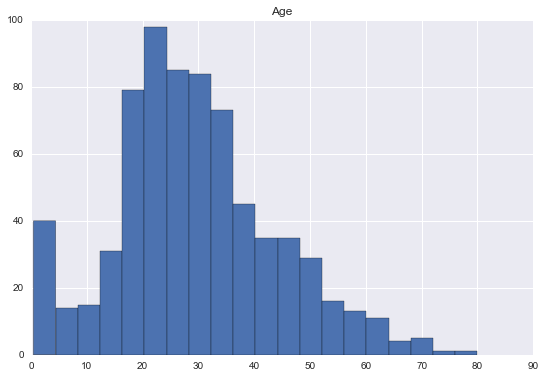

In [15]:
df.hist(column='Age',    # Column to plot
                   figsize=(9,6),   # Plot size
                   bins=20)         # Number of histogram bins

From the histogram, we see that ages between 20 and 30 are the most common, so filling in missing values with a central number like the mean or median wouldn't be entirely unreasonable. Let's fill in the missing values with the median value.

In [16]:
median_age = df['Age'].median()

In [17]:
df.Age = df.Age.fillna(median_age)

In [18]:
max_embark = df.Embarked.value_counts().argmax()
max_embark

'S'

The NA value in Embarked Column will be filled by Station 'S' where most of the passengers in dataset embarked.

In [19]:
df.Embarked = df.Embarked.fillna(max_embark)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,Died,Class3,male,22.0,1,0,7.2500,S
1,Survived,Class1,female,38.0,1,0,71.2833,C
2,Survived,Class3,female,26.0,0,0,7.9250,S
3,Survived,Class1,female,35.0,1,0,53.1000,S
4,Died,Class3,male,35.0,0,0,8.0500,S


# Data Exploration & Visualisation

In [21]:
def passenger_by_catagory(catagory):
    passenger_by_catagory = df[catagory].value_counts()
    return passenger_by_catagory

In [22]:
print passenger_by_catagory('Sex') # Passenger count by Gender
print passenger_by_catagory('Embarked') # Passenger count by Station Embarked
print passenger_by_catagory('Pclass') # Passenger count by Station Class

male      577
female    314
dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64
Class3    491
Class1    216
Class2    184
dtype: int64


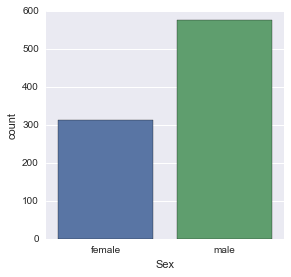

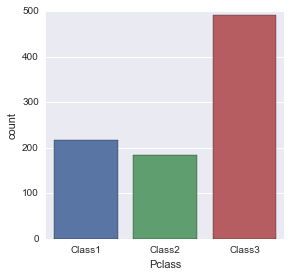

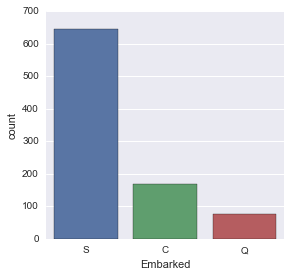

In [24]:
sns.factorplot('Sex', data = df, kind = 'count')
sns.factorplot('Pclass', data = df, kind = 'count')
sns.factorplot('Embarked', data = df, kind = 'count')

The above analysis shows that male passengers were more than female passengers. Also maximum passengers were from Class 3 and most of the passengers embarked from Station S.

In [25]:
def survived_by_catagory(catagory):
    survived_by_catagory = df[df.Survived == "Survived"].groupby(catagory).count()['Survived']
    return survived_by_catagory

In [26]:
print "No. of Passenger Survived by : {}".format(survived_by_catagory('Sex'))
print "No. of Passenger Survived by : {}".format(survived_by_catagory('Pclass'))
print "No. of Passenger Survived by Station : {}".format(survived_by_catagory('Embarked'))

print "Percentage of Passenger Survived by Sex:\n{}".format((survived_by_catagory('Sex')/passenger_by_catagory('Sex'))*100)
print "Percentage of Passenger Survived by Class:\n{}".format((survived_by_catagory('Pclass')/passenger_by_catagory('Pclass'))*100)
print "Percentage of Passenger Survived by Station Embarked:\n{}".format((survived_by_catagory('Embarked')/passenger_by_catagory('Embarked'))*100)

No. of Passenger Survived by : Sex
female    233
male      109
Name: Survived, dtype: int64
No. of Passenger Survived by : Pclass
Class1    136
Class2     87
Class3    119
Name: Survived, dtype: int64
No. of Passenger Survived by Station : Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64
Percentage of Passenger Survived by Sex:
female    74.203822
male      18.890815
dtype: float64
Percentage of Passenger Survived by Class:
Class1    62.962963
Class2    47.282609
Class3    24.236253
dtype: float64
Percentage of Passenger Survived by Station Embarked:
C    55.357143
Q    38.961039
S    33.900929
dtype: float64


In [27]:
def died_by_catagory(catagory):
    died_by_catagory = df[df.Survived == "Died"].groupby(catagory).count()['Survived']
    return died_by_catagory

In [28]:
print "No. of Passenger Died by Gender : {}".format(died_by_catagory('Sex'))
print "No. of Passenger Died by Class: {}".format(died_by_catagory('Pclass'))
print "No. of Passenger Died by Station : {}".format(died_by_catagory('Embarked'))

print "Percentage of Passenger Died by Sex:\n{}".format((died_by_catagory('Sex')/passenger_by_catagory('Sex'))*100)
print "Percentage of Passenger Died by Class:\n{}".format((died_by_catagory('Pclass')/passenger_by_catagory('Pclass'))*100)
print "Percentage of Passenger Died by Station Embarked:\n{}".format((died_by_catagory('Embarked')/passenger_by_catagory('Embarked'))*100)

No. of Passenger Died by Gender : Sex
female     81
male      468
Name: Survived, dtype: int64
No. of Passenger Died by Class: Pclass
Class1     80
Class2     97
Class3    372
Name: Survived, dtype: int64
No. of Passenger Died by Station : Embarked
C     75
Q     47
S    427
Name: Survived, dtype: int64
Percentage of Passenger Died by Sex:
female    25.796178
male      81.109185
dtype: float64
Percentage of Passenger Died by Class:
Class1    37.037037
Class2    52.717391
Class3    75.763747
dtype: float64
Percentage of Passenger Died by Station Embarked:
C    44.642857
Q    61.038961
S    66.099071
dtype: float64


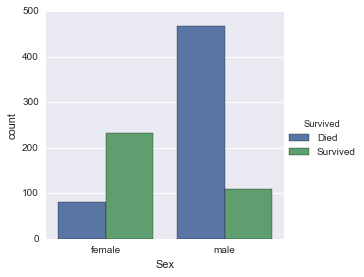

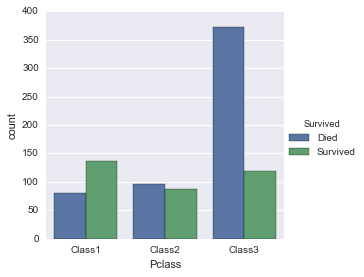

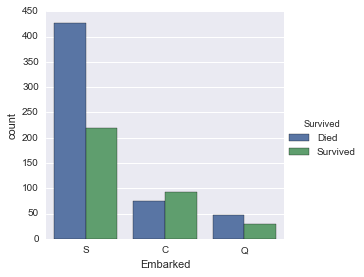

In [29]:
sns.factorplot(x = "Sex", hue = "Survived", data=df, kind = 'count')
sns.factorplot(x = "Pclass", hue = "Survived", data=df, kind = 'count')
sns.factorplot(x = "Embarked", hue = "Survived", data=df, kind = 'count')

In [30]:
# Maximum & Minimum age of the Passenger Survived

max_age_survived = df[df.Survived == "Survived"].Age.max()
min_age_survived = df[df.Survived == "Survived"].Age.min()
print 'The maximum age of passenger survived is {}'.format(max_age_survived)
print 'The minimum age of passenger survived is {}'.format(min_age_survived)


The maximum age of passenger survived is 80.0
The minimum age of passenger survived is 0.42


In [31]:
# Maximum & Minimum age of the Passenger Died
max_age_died = df[df.Survived == "Died"].Age.max()
min_age_died = df[df.Survived == "Died"].Age.min()
print 'The maximum age of passenger died is {}'.format(max_age_died)
print 'The minimum age of passenger died is {}'.format(min_age_died)

# This shows that all the kids below 1 year age were saved.

The maximum age of passenger died is 74.0
The minimum age of passenger died is 1.0


 Now we will check whether age had any relation to survival.

In [32]:
survivor_data = df.groupby('Survived')
survivor_data.describe()

Age        Fare       Parch       SibSp
Survived                                                      
Died     count  549.000000  549.000000  549.000000  549.000000
         mean    30.028233   22.117887    0.329690    0.553734
         std     12.499986   31.388207    0.823166    1.288399
         min      1.000000    0.000000    0.000000    0.000000
         25%     23.000000    7.854200    0.000000    0.000000
         50%     28.000000   10.500000    0.000000    0.000000
         75%     35.000000   26.000000    0.000000    1.000000
         max     74.000000  263.000000    6.000000    8.000000
Survived count  342.000000  342.000000  342.000000  342.000000
         mean    28.291433   48.395408    0.464912    0.473684
         std     13.764425   66.596998    0.771712    0.708688
         min      0.420000    0.000000    0.000000    0.000000
         25%     21.000000   12.475000    0.000000    0.000000
         50%     28.000000   26.000000    0.000000    0.000000
         75%     35.000000   57.000000    1.000000    1.000000
         max     80.000000  512.329200    5.000000    4.000000

 mean age of survivors and non-survivors was very close. And with a standard deviation of about 14, the mean age for each group is well within one standard deviation of the other group, meaning that the difference in mean ages is not statistically significant.

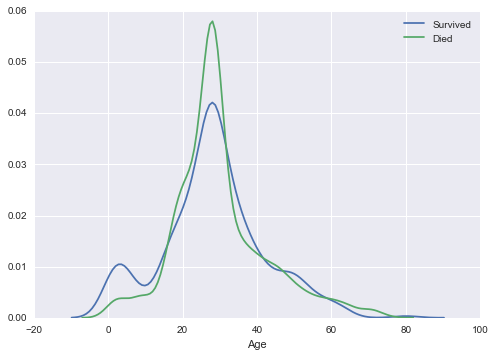

In [33]:
df[df['Survived'] == "Survived"].Age
sns.distplot(df[df['Survived'] == "Survived"].Age,hist= False, kde= True, label = "Survived");
sns.distplot(df[df['Survived'] == "Died"].Age, hist = False, kde= True, label = "Died");

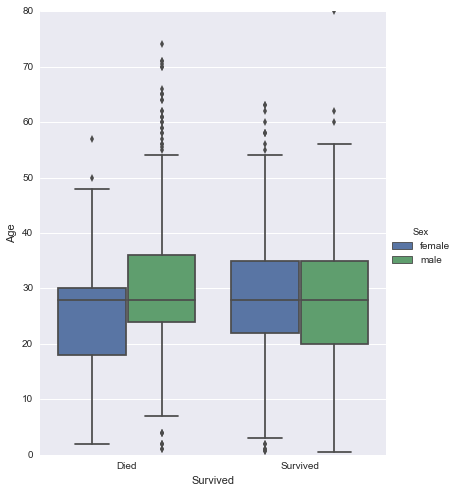

In [34]:
sns.factorplot(x="Survived", y="Age", hue='Sex', data=df, kind="box", size=7, aspect=.8)

A look at the Kernel Density Estimate plot & the boxplot of the ages of each group almost overlaps and maximum probability density is at approx age 30 years.Average age for those who survived and even those who did not survive were inline with each other. This also suggests that age did not seem to be a significant deciding factor in predicting the survival.

#### Now We will analyse data to get the answers of the questioned posed in the beginning.

> Q1 : How does the sex related to survival of passengers irrespective of their class or any other factor i.e. was being female a favourable condition for survival irrespective of age, SES (socio-economic status) or any other factor?

In [208]:
def survival_rate_by_factor(factor):
    df_survived = df[df.Survived == "Survived"]
    Survival_count_by_sex_in_factor = df_survived.groupby([factor,'Sex']).size()
    count_by_sex_in_factor=df.groupby([factor,'Sex']).size()
    survival_rate_by_factor = (Survival_count_by_sex_in_factor/count_by_sex_in_factor)*100
    print survival_rate_by_factor

In [209]:
survival_rate_by_factor('Pclass')

Pclass  Sex   
Class1  female    96.808511
        male      36.885246
Class2  female    92.105263
        male      15.740741
Class3  female    50.000000
        male      13.544669
dtype: float64


In [261]:
survival_rate_by_factor('Pclass')

Pclass  Sex   
Class1  female    96.808511
        male      36.885246
Class2  female    92.105263
        male      15.740741
Class3  female    50.000000
        male      13.544669
dtype: float64


In [210]:
survival_rate_by_factor('Embarked')

Embarked  Sex   
C         female    87.671233
          male      30.526316
Q         female    75.000000
          male       7.317073
S         female    69.268293
          male      17.460317
dtype: float64


In [231]:
df_survived= df[df['Survived'] == "Survived"]

In [241]:
df_survived_male = df_survived[df_survived['Sex']=='male']
df_survived_female = df_survived[df_survived['Sex']=='female']

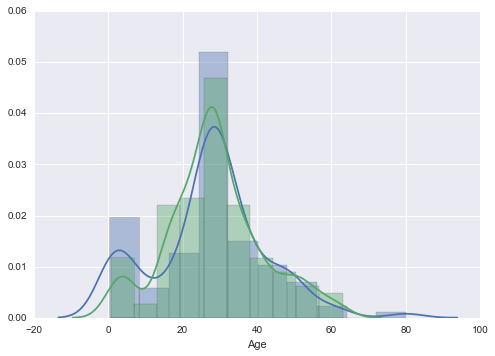

In [254]:
sns.distplot(df_survived_male.Age, kde = True,label = "Male",bins=10)
sns.distplot(df_survived_female.Age, kde = True,label = "Female", bins = 10)
